<a href="https://colab.research.google.com/github/lukmanaj/coursera-statistical-analysis-with-r-for-public-health/blob/main/notebooks/Linear_Regression_in_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
library(tidyverse)

# Preliminaries
COPD <- read_csv("https://raw.githubusercontent.com/lukmanaj/coursera-statistical-analysis-with-r-for-public-health/main/data/COPD_student_dataset.csv")
COPD


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.4.4     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
New names:
• `` -> `...1`
Rows: 101 Columns: 24
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (1): COPDSEVERITY
dbl (23): ...1, ID, AGE, PackHistory, MWT1, MWT2, MWT1Best, FEV1, FEV1PRED, ...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


...1,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,⋯,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,58,77,60,SEVERE,120,120,120,1.21,36.00,⋯,69.55,4,3,1,2,1,0,0,1,0
2,57,79,50,MODERATE,165,176,176,1.09,56.00,⋯,44.24,4,2,0,2,1,0,0,1,1
3,62,80,11,MODERATE,201,180,201,1.52,68.00,⋯,44.09,4,2,0,2,1,0,0,1,0
4,145,56,60,VERY SEVERE,210,210,210,0.47,14.00,⋯,62.04,1,4,1,2,0,0,1,1,0
5,136,65,68,SEVERE,204,210,210,1.07,42.00,⋯,75.56,1,3,1,2,0,1,1,0,0
6,84,67,26,MODERATE,216,180,216,1.09,50.00,⋯,73.82,2,2,0,1,1,0,0,1,0
7,93,67,50,SEVERE,214,237,237,0.69,35.00,⋯,77.44,2,3,0,1,1,0,0,1,0
8,27,83,90,SEVERE,214,237,237,0.68,32.00,⋯,45.41,4,3,1,2,1,0,0,1,0
9,114,72,50,MODERATE,231,237,237,2.13,63.00,⋯,69.61,3,2,1,1,1,0,0,1,0


In [4]:
# Examining the dataset
dim(COPD)


[1] 101  24

In [5]:
print(colnames(COPD))


 [1] "...1"         "ID"           "AGE"          "PackHistory"  "COPDSEVERITY"
 [6] "MWT1"         "MWT2"         "MWT1Best"     "FEV1"         "FEV1PRED"    
[11] "FVC"          "FVCPRED"      "CAT"          "HAD"          "SGRQ"        
[16] "AGEquartiles" "copd"         "gender"       "smoking"      "Diabetes"    
[21] "muscular"     "hypertension" "AtrialFib"    "IHD"         


In [7]:
print(str(COPD))


spc_tbl_ [101 × 24] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1        : num [1:101] 1 2 3 4 5 6 7 8 9 10 ...
 $ ID          : num [1:101] 58 57 62 145 136 84 93 27 114 152 ...
 $ AGE         : num [1:101] 77 79 80 56 65 67 67 83 72 75 ...
 $ PackHistory : num [1:101] 60 50 11 60 68 26 50 90 50 6 ...
 $ COPDSEVERITY: chr [1:101] "SEVERE" "MODERATE" "MODERATE" "VERY SEVERE" ...
 $ MWT1        : num [1:101] 120 165 201 210 204 216 214 214 231 226 ...
 $ MWT2        : num [1:101] 120 176 180 210 210 180 237 237 237 240 ...
 $ MWT1Best    : num [1:101] 120 176 201 210 210 216 237 237 237 240 ...
 $ FEV1        : num [1:101] 1.21 1.09 1.52 0.47 1.07 1.09 0.69 0.68 2.13 1.06 ...
 $ FEV1PRED    : num [1:101] 36 56 68 14 42 50 35 32 63 46 ...
 $ FVC         : num [1:101] 2.4 1.64 2.3 1.14 2.91 1.99 1.31 2.23 4.38 2.06 ...
 $ FVCPRED     : num [1:101] 98 65 86 27 98 60 48 77 80 75 ...
 $ CAT         : num [1:101] 25 12 22 28 32 29 29 22 25 31 ...
 $ HAD         : num [1:101] 8 21 18 26 18 2

In [8]:
head(COPD)


...1,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,⋯,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,58,77,60,SEVERE,120,120,120,1.21,36,⋯,69.55,4,3,1,2,1,0,0,1,0
2,57,79,50,MODERATE,165,176,176,1.09,56,⋯,44.24,4,2,0,2,1,0,0,1,1
3,62,80,11,MODERATE,201,180,201,1.52,68,⋯,44.09,4,2,0,2,1,0,0,1,0
4,145,56,60,VERY SEVERE,210,210,210,0.47,14,⋯,62.04,1,4,1,2,0,0,1,1,0
5,136,65,68,SEVERE,204,210,210,1.07,42,⋯,75.56,1,3,1,2,0,1,1,0,0
6,84,67,26,MODERATE,216,180,216,1.09,50,⋯,73.82,2,2,0,1,1,0,0,1,0


In [9]:
class(COPD$AGE)


[1] "numeric"

In [10]:
summary(COPD$AGE) #gives NAs,if any


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   44.0    65.0    71.0    70.1    75.0    88.0 

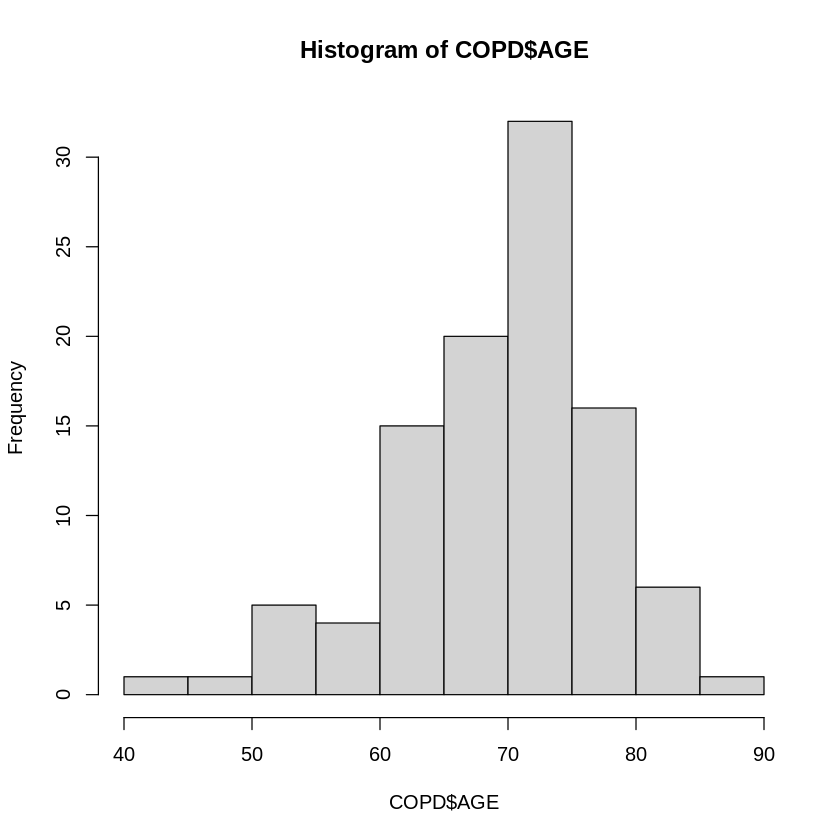

In [11]:
hist(COPD$AGE)


In [12]:
#categorical variable
class(COPD$COPDSEVERITY)
class(COPD$gender)


[1] "character"

[1] "numeric"

In [13]:
table(COPD$COPDSEVERITY,exclude = NULL)



       MILD    MODERATE      SEVERE VERY SEVERE 
         23          43          27           8 

In [14]:
COPD$COPDSEVERITY <- as_factor(COPD$COPDSEVERITY)
class(COPD$COPDSEVERITY)


[1] "factor"

In [15]:
COPD$gender <- as_factor(COPD$gender)
class(COPD$gender)



[1] "factor"

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.
Warning message:
“Removed 1 rows containing non-finite values (`stat_bin()`).”


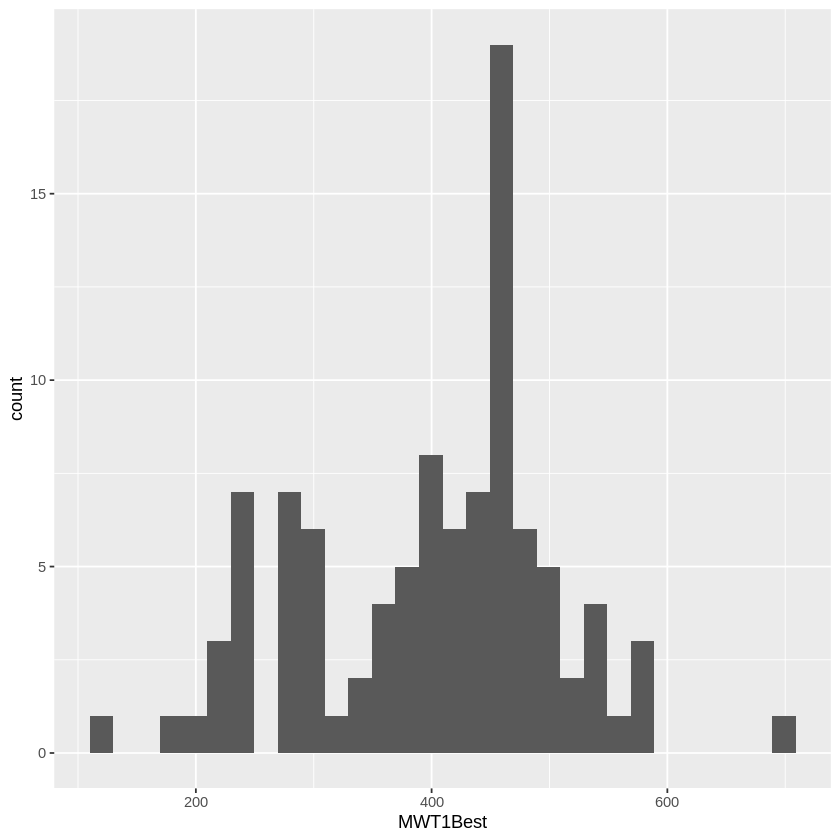

In [17]:
ggplot(COPD, aes(x=MWT1Best)) + geom_histogram()


...1,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,⋯,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
100,108,54,30,SEVERE,688,699,699,1.72,44,⋯,20.55,1,3,1,2,0,0,0,0,0


...1,ID,AGE,PackHistory,COPDSEVERITY,MWT1,MWT2,MWT1Best,FEV1,FEV1PRED,⋯,SGRQ,AGEquartiles,copd,gender,smoking,Diabetes,muscular,hypertension,AtrialFib,IHD
<dbl>,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,58,77,60,SEVERE,120,120,120,1.21,36,⋯,69.55,4,3,1,2,1,0,0,1,0
100,108,54,30,SEVERE,688,699,699,1.72,44,⋯,20.55,1,3,1,2,0,0,0,0,0


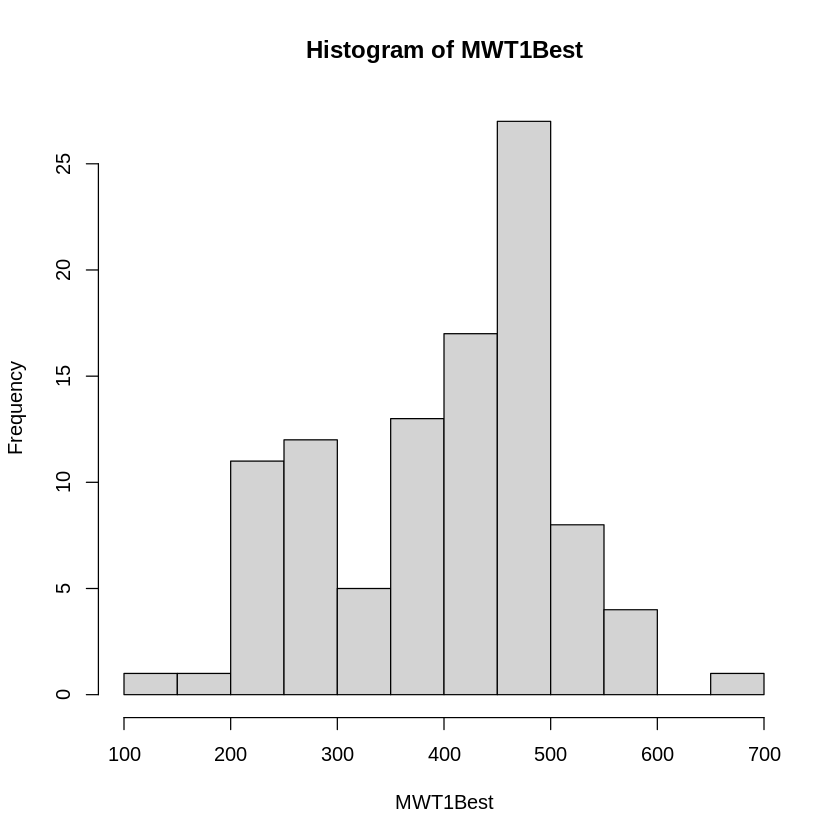

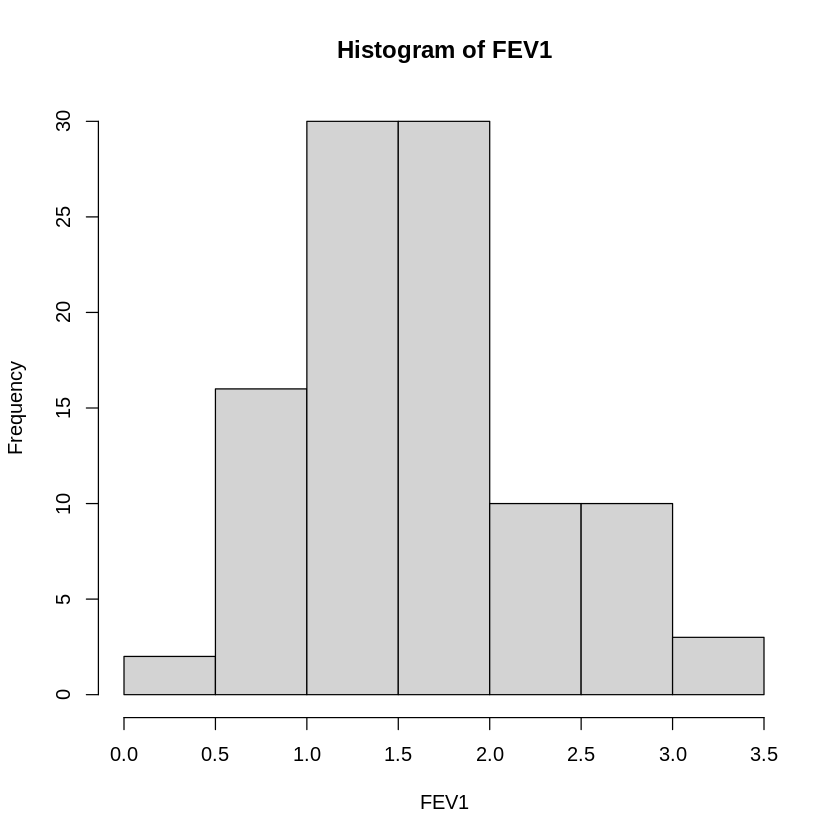

In [18]:
hist(COPD$MWT1Best, main="Histogram of MWT1Best", xlab="MWT1Best", breaks=12)
subset(COPD, MWT1Best > 650)
subset(COPD, MWT1Best > 600 | MWT1Best < 150)
hist(COPD$FEV1, main="Histogram of FEV1", xlab="FEV1")


In [19]:
summary(COPD$MWT1Best)


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  120.0   303.8   420.0   399.1   465.2   699.0       1 

In [20]:
mean(COPD$MWT1Best, na.rm = TRUE)
  sd(COPD$MWT1Best, na.rm = TRUE)
range(COPD$MWT1Best,na.rm = TRUE)
IQR(COPD$MWT1Best,na.rm = TRUE)
desc<- list("Summary" = summary(COPD$MWT1Best), "Mean" = mean(COPD$MWT1Best, na.rm=TRUE), "Standard Deviation" = sd(COPD$MWT1Best, na.rm=TRUE), "Range" = range(COPD$MWT1Best, na.rm=TRUE), "Inter-Quartile Range" = IQR(COPD$MWT1Best, na.rm=TRUE))

desc


[1] 399.11

[1] 106.5501

[1] 120 699

[1] 161.5

$Summary
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  120.0   303.8   420.0   399.1   465.2   699.0       1 

$Mean
[1] 399.11

$`Standard Deviation`
[1] 106.5501

$Range
[1] 120 699

$`Inter-Quartile Range`
[1] 161.5


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.450   1.100   1.600   1.604   1.960   3.180 

[1] 0.6727627

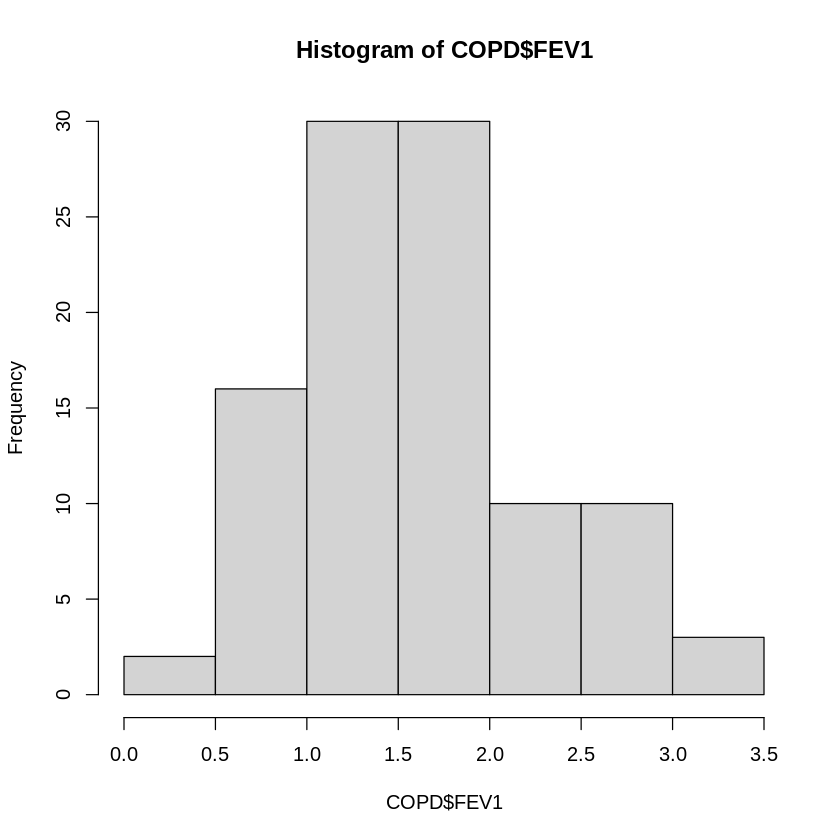

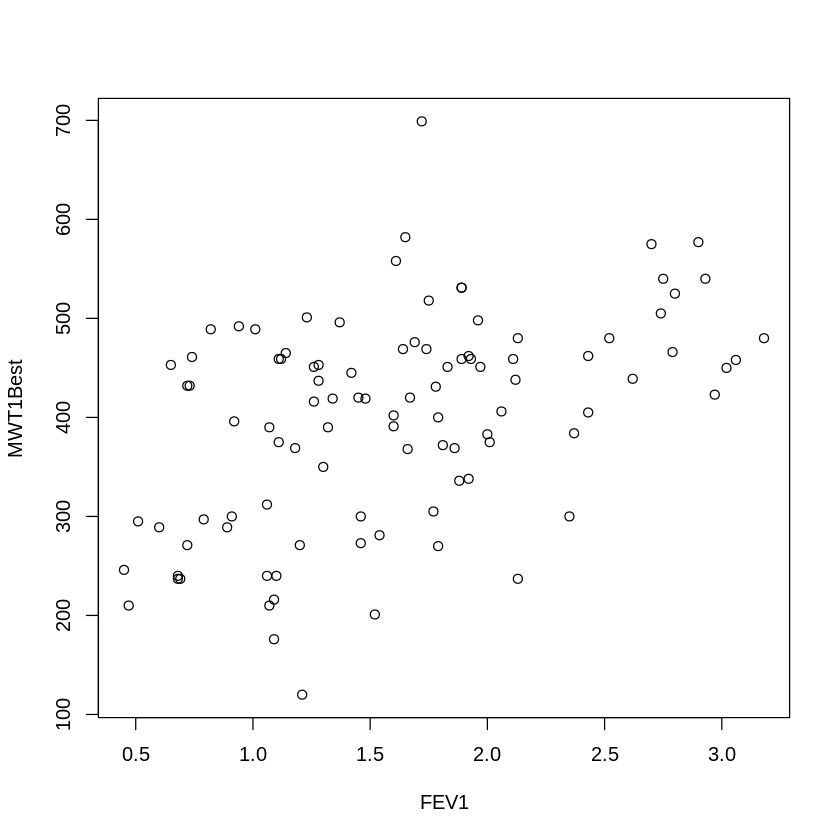

In [21]:
hist(COPD$FEV1)
summary(COPD$FEV1)
sd(COPD$FEV1)

plot(COPD$FEV1, COPD$MWT1Best, xlab = "FEV1", ylab = "MWT1Best")


In [22]:
cor.test(COPD$FEV1,COPD$MWT1Best,use="complete.obs",method="pearson")



	Pearson's product-moment correlation

data:  COPD$FEV1 and COPD$MWT1Best
t = 5.26, df = 98, p-value = 8.469e-07
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.3004898 0.6094629
sample estimates:
      cor 
0.4692142 


In [23]:
cor.test(COPD$FEV1,COPD$MWT1Best,use="complete.obs",method="spearman")
# General formula
# cor.test(x, y, method=c(“pearson”, “kendall”, “spearman”))


Warning message in cor.test.default(COPD$FEV1, COPD$MWT1Best, use = "complete.obs", :
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  COPD$FEV1 and COPD$MWT1Best
S = 90853, p-value = 1.995e-06
alternative hypothesis: true rho is not equal to 0
sample estimates:
      rho 
0.4548251 


In [24]:
cor.test(COPD$AGE,COPD$FEV1,use="complete.obs",method="pearson")
cor.test(COPD$AGE,COPD$FEV1,use="complete.obs",method="spearman")



	Pearson's product-moment correlation

data:  COPD$AGE and COPD$FEV1
t = -1.0214, df = 99, p-value = 0.3095
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 -0.29173893  0.09521727
sample estimates:
       cor 
-0.1021224 


Warning message in cor.test.default(COPD$AGE, COPD$FEV1, use = "complete.obs", method = "spearman"):
“Cannot compute exact p-value with ties”



	Spearman's rank correlation rho

data:  COPD$AGE and COPD$FEV1
S = 187147, p-value = 0.371
alternative hypothesis: true rho is not equal to 0
sample estimates:
        rho 
-0.08996312 



Call:
lm(formula = MWT1Best ~ FEV1, data = COPD)

Residuals:
     Min       1Q   Median       3Q      Max 
-249.592  -58.227    7.881   63.551  291.612 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   279.92      24.55   11.40  < 2e-16 ***
FEV1           74.11      14.09    5.26 8.47e-07 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 94.57 on 98 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2202,	Adjusted R-squared:  0.2122 
F-statistic: 27.67 on 1 and 98 DF,  p-value: 8.469e-07


,2.5 %,97.5 %
(Intercept),231.19004,328.6456
FEV1,46.15031,102.0710


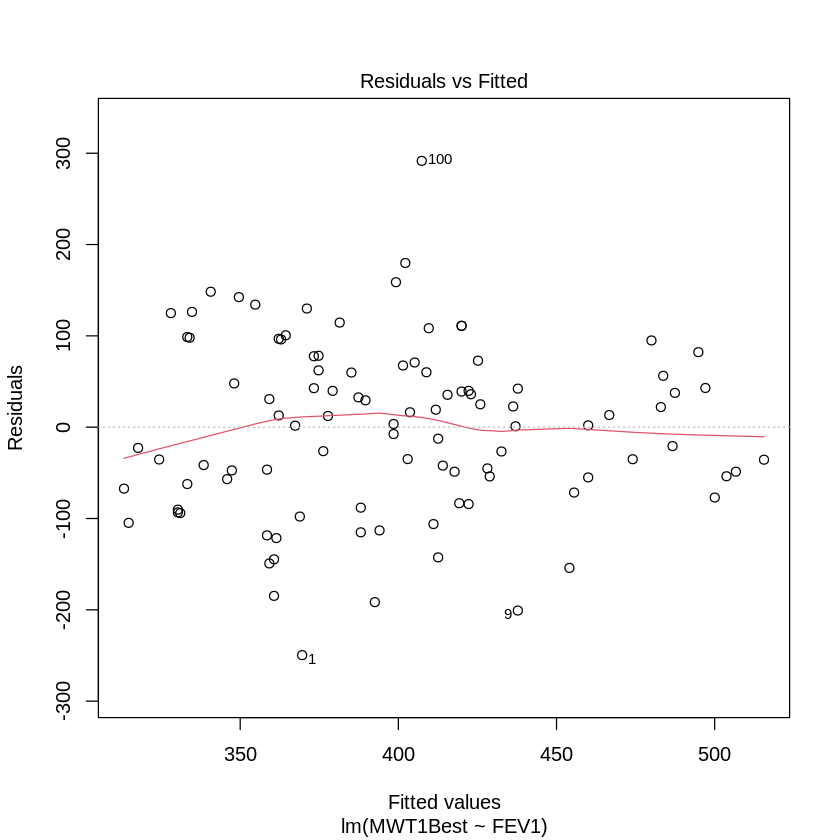

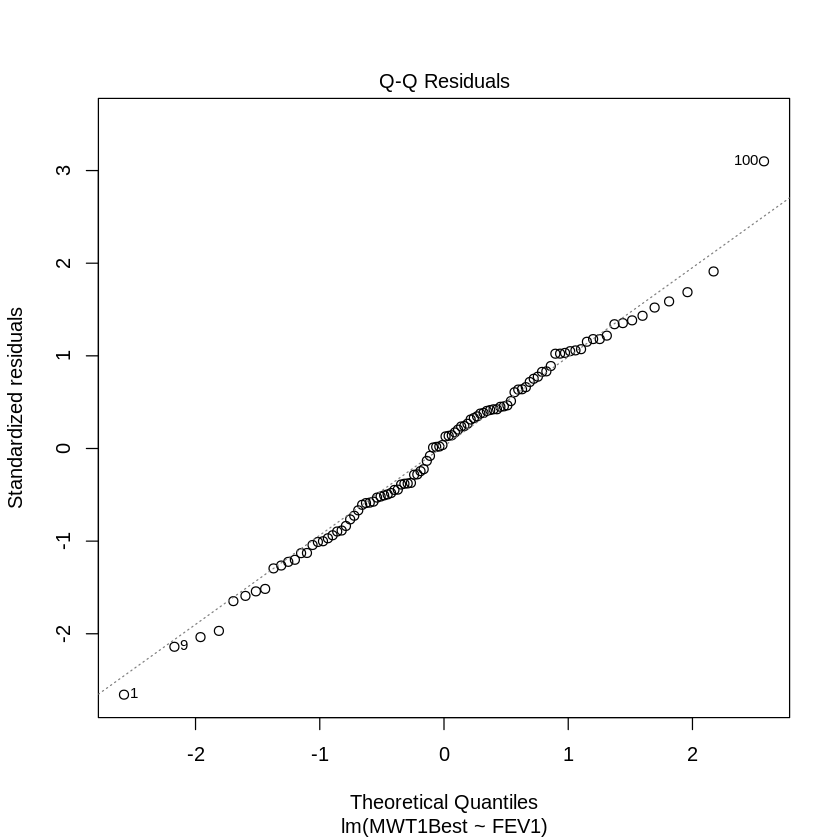

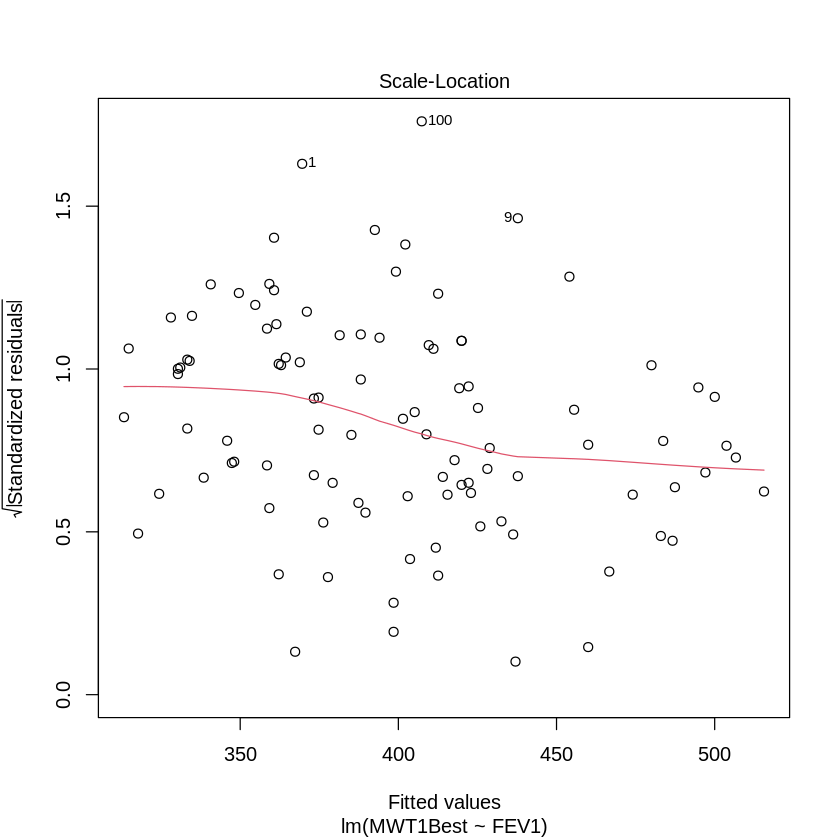

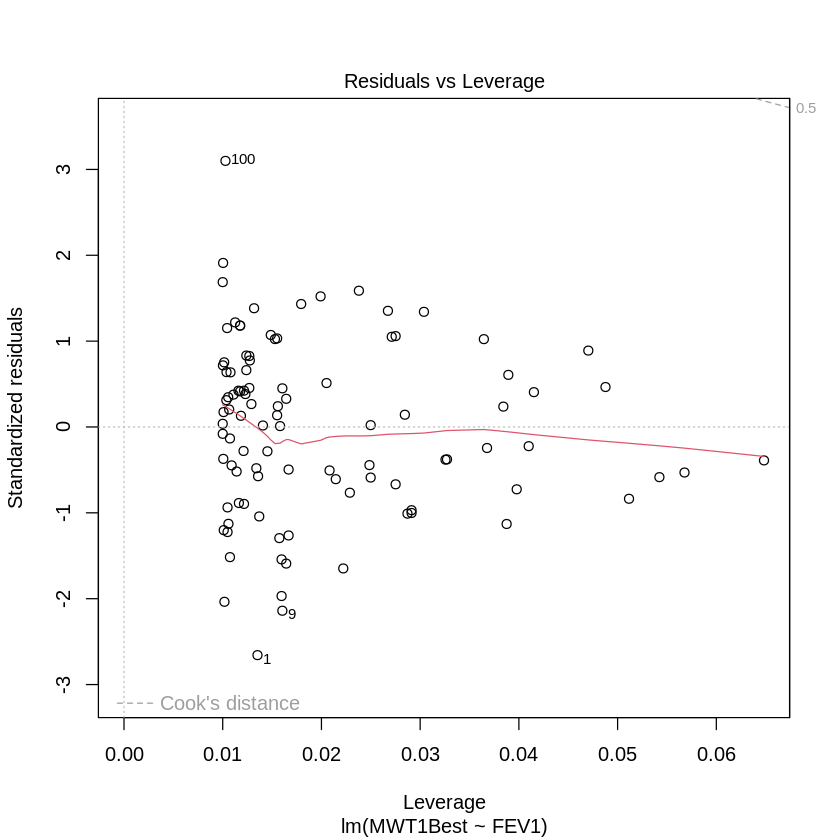

In [25]:
# Linear Regression Proper

MWT1Best_FEV1 <- lm(MWT1Best~FEV1,data = COPD)
summary(MWT1Best_FEV1)
confint(MWT1Best_FEV1)
plot(MWT1Best_FEV1)  #didn't work, have to troubleshoot.


In [26]:
par(mfrow=c(1,1))



Call:
lm(formula = MWT1Best ~ AGE, data = COPD)

Residuals:
    Min      1Q  Median      3Q     Max 
-257.44  -84.40   20.30   67.87  250.16 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  616.453     93.440   6.597 2.14e-09 ***
AGE           -3.104      1.326  -2.341   0.0213 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 104.2 on 98 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.05294,	Adjusted R-squared:  0.04328 
F-statistic: 5.478 on 1 and 98 DF,  p-value: 0.02128


,2.5 %,97.5 %
(Intercept),431.023080,801.8819906
AGE,-5.735718,-0.4722946


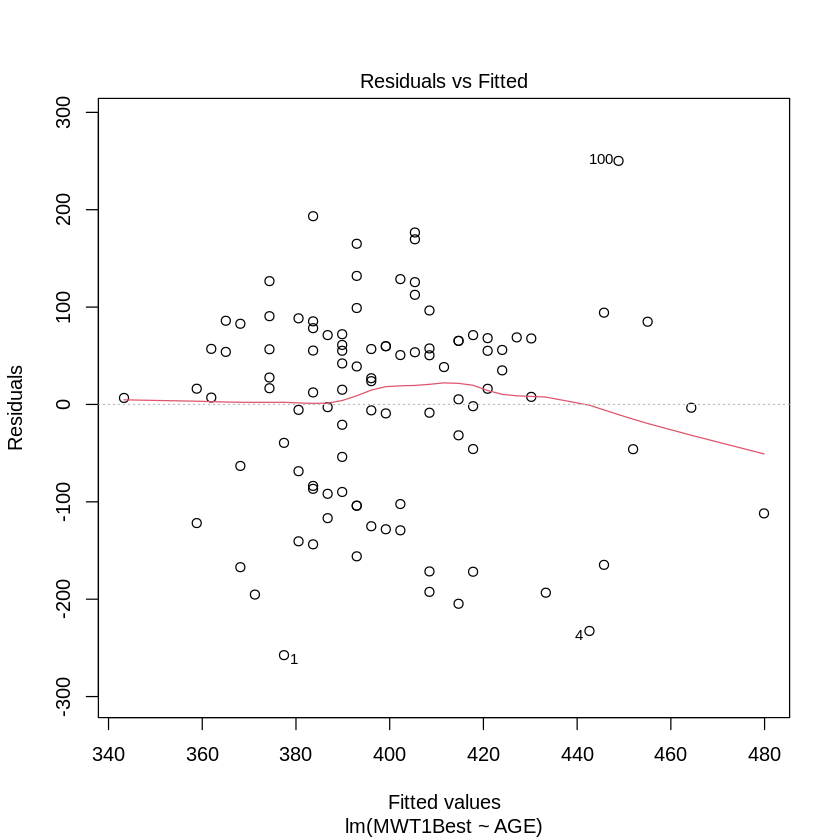

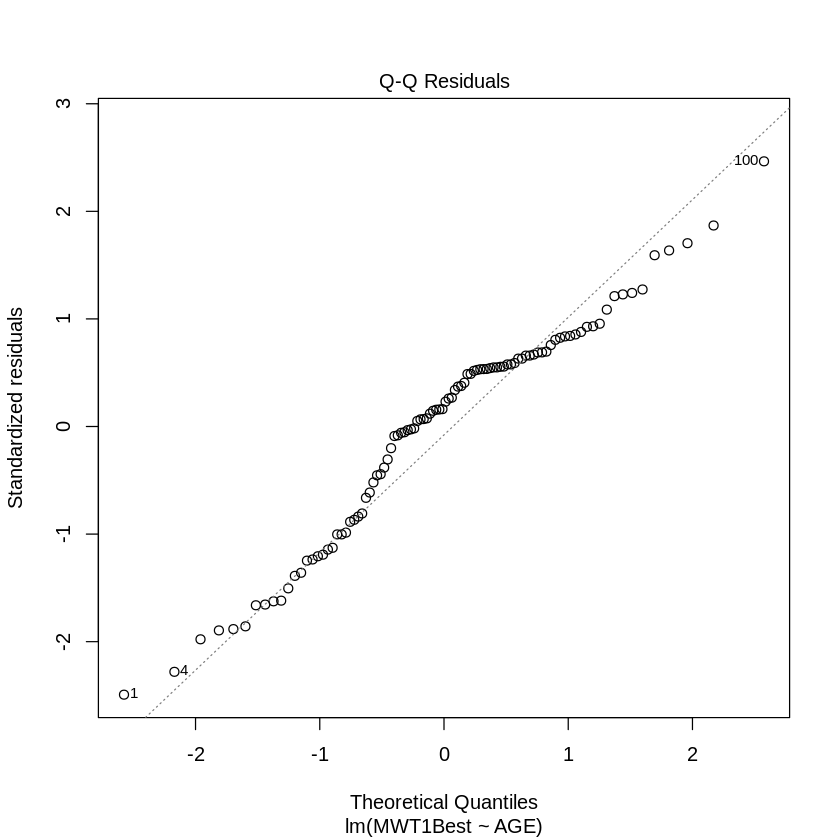

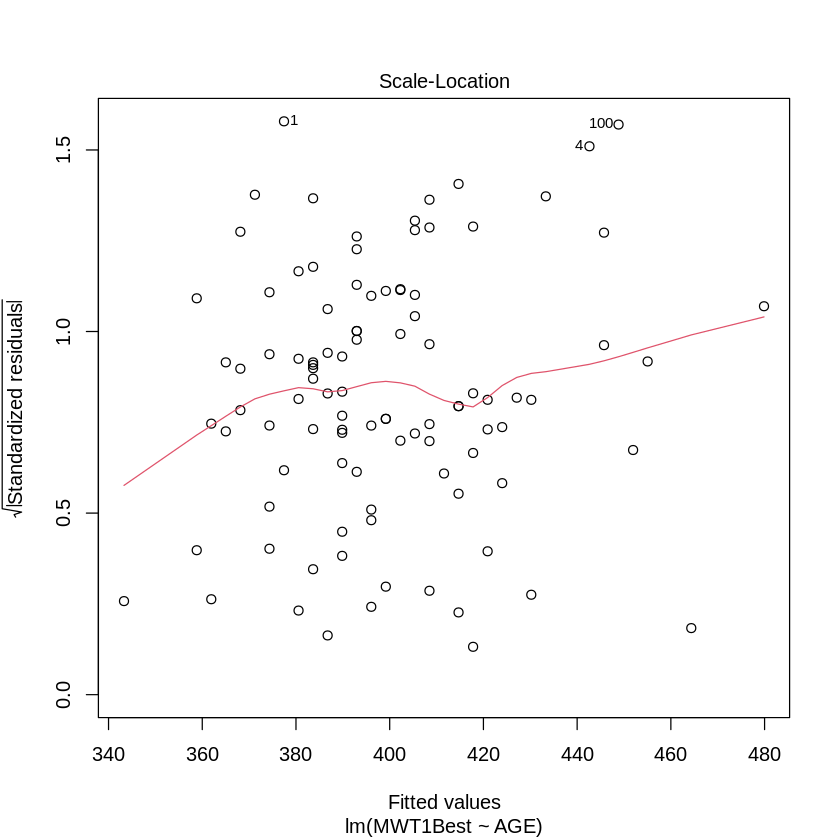

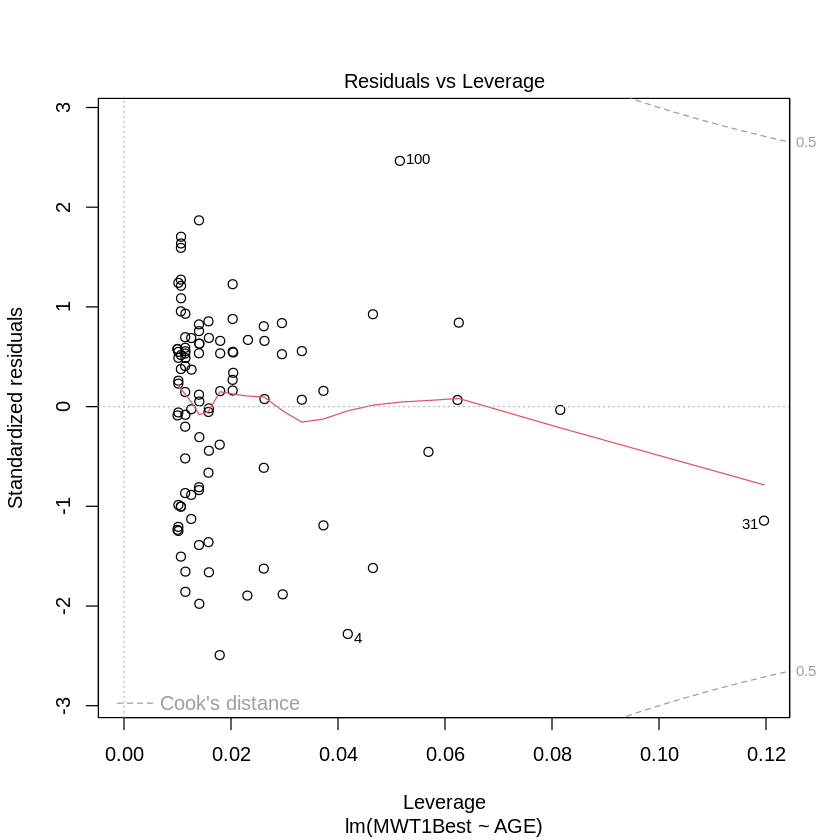

In [27]:
MWT1Best_AGE <- lm(MWT1Best~AGE,data = COPD)
summary(MWT1Best_AGE)
confint(MWT1Best_AGE)
plot(MWT1Best_AGE)




Call:
lm(formula = MWT1Best ~ FEV1 + AGE, data = COPD)

Residuals:
    Min      1Q  Median      3Q     Max 
-233.13  -62.55   16.81   67.41  251.57 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  460.887     88.675   5.197 1.12e-06 ***
FEV1          71.278     13.909   5.125 1.52e-06 ***
AGE           -2.519      1.188  -2.121   0.0365 *  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 92.93 on 97 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2547,	Adjusted R-squared:  0.2394 
F-statistic: 16.58 on 2 and 97 DF,  p-value: 6.419e-07


,2.5 %,97.5 %
(Intercept),284.892098,636.8819576
FEV1,43.672965,98.8837921
AGE,-4.877264,-0.1616972


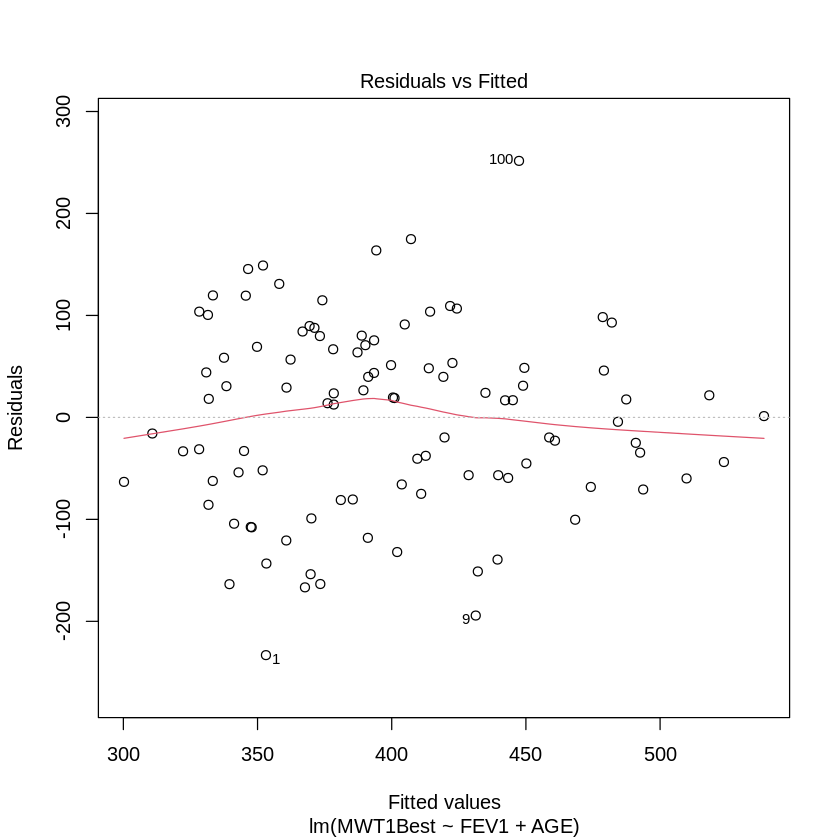

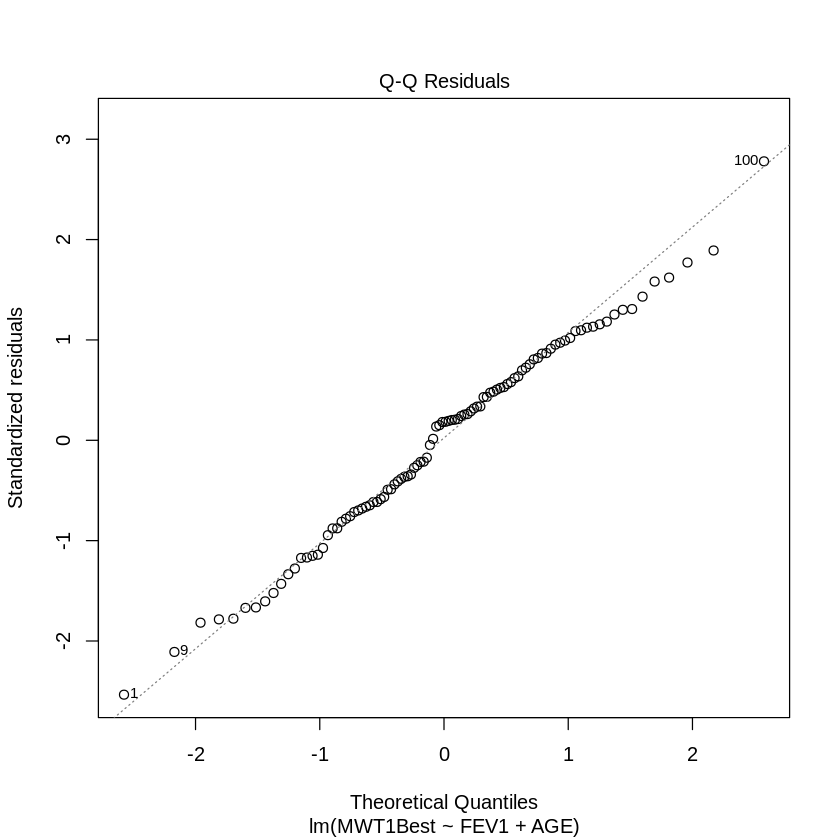

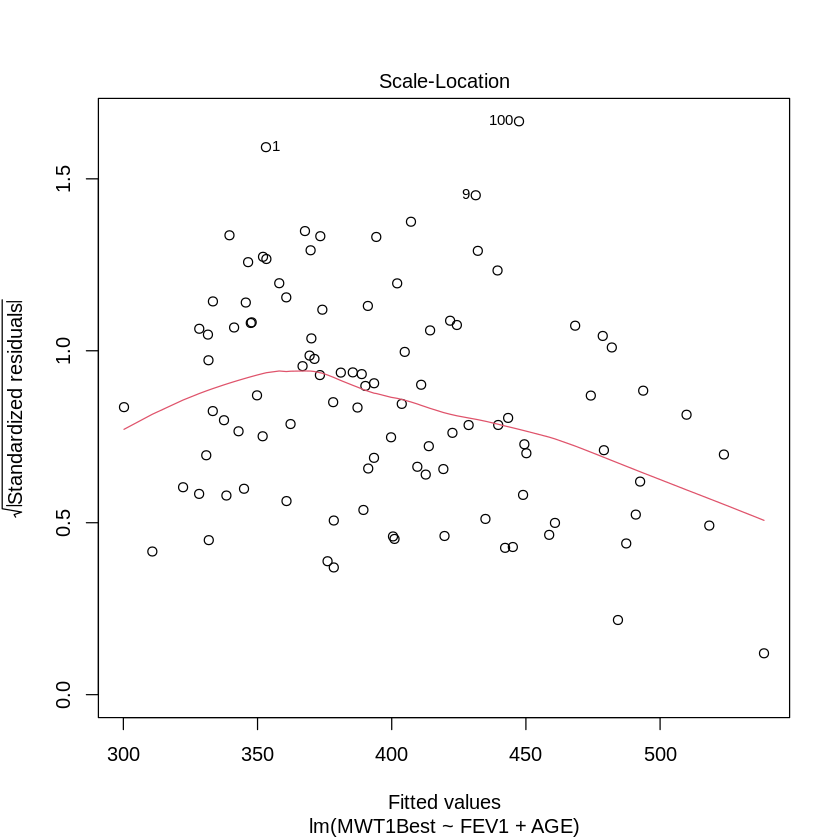

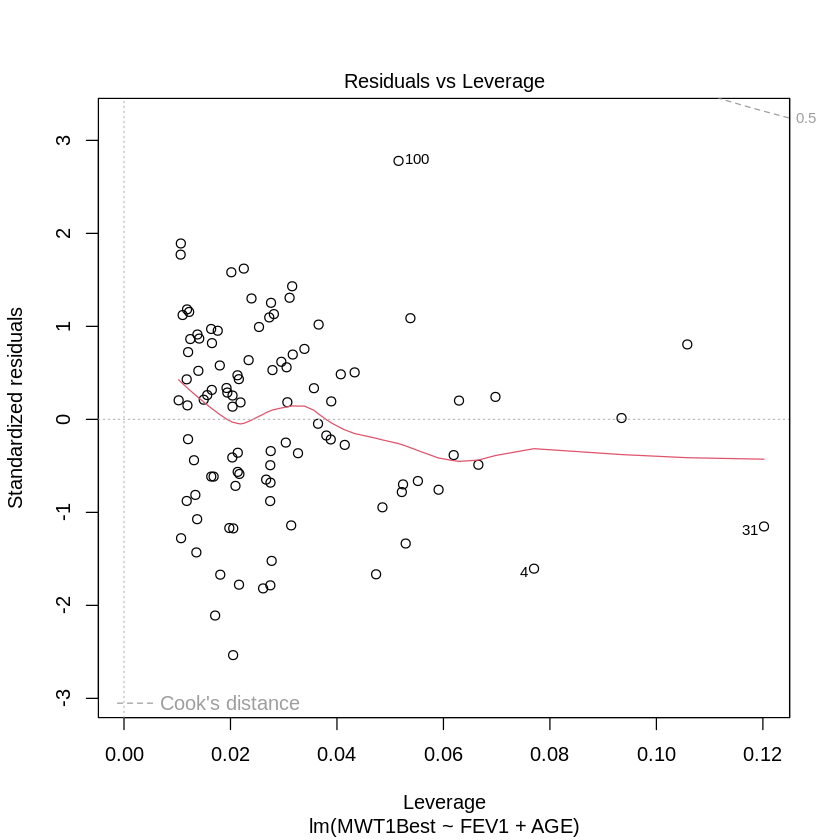

In [28]:
# Multiple Linear Regression

MWT1Best_FEV1_AGE <- lm(MWT1Best~FEV1+AGE,data = COPD)
summary(MWT1Best_FEV1_AGE)
confint(MWT1Best_FEV1_AGE)
plot(MWT1Best_FEV1_AGE)



Call:
lm(formula = MWT1Best ~ FVC, data = COPD)

Residuals:
     Min       1Q   Median       3Q      Max 
-251.663  -66.598    6.364   63.539  246.125 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  254.951     30.779   8.283 6.28e-13 ***
FVC           48.630      9.866   4.929 3.37e-06 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 95.87 on 98 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.1987,	Adjusted R-squared:  0.1905 
F-statistic: 24.29 on 1 and 98 DF,  p-value: 3.368e-06



Call:
lm(formula = MWT1Best ~ FVC + AGE, data = COPD)

Residuals:
    Min      1Q  Median      3Q     Max 
-236.89  -66.05   12.55   75.54  211.72 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  425.377     94.099   4.521 1.74e-05 ***
FVC           46.058      9.827   4.687 9.06e-06 ***
AGE           -2.325      1.215  -1.914   0.0586 .  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 94.59 on 97 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.2278,	Adjusted R-squared:  0.2119 
F-statistic: 14.31 on 2 and 97 DF,  p-value: 3.588e-06


,2.5 %,97.5 %
(Intercept),238.616666,612.13818023
FVC,26.553107,65.56260023
AGE,-4.736637,0.08649919


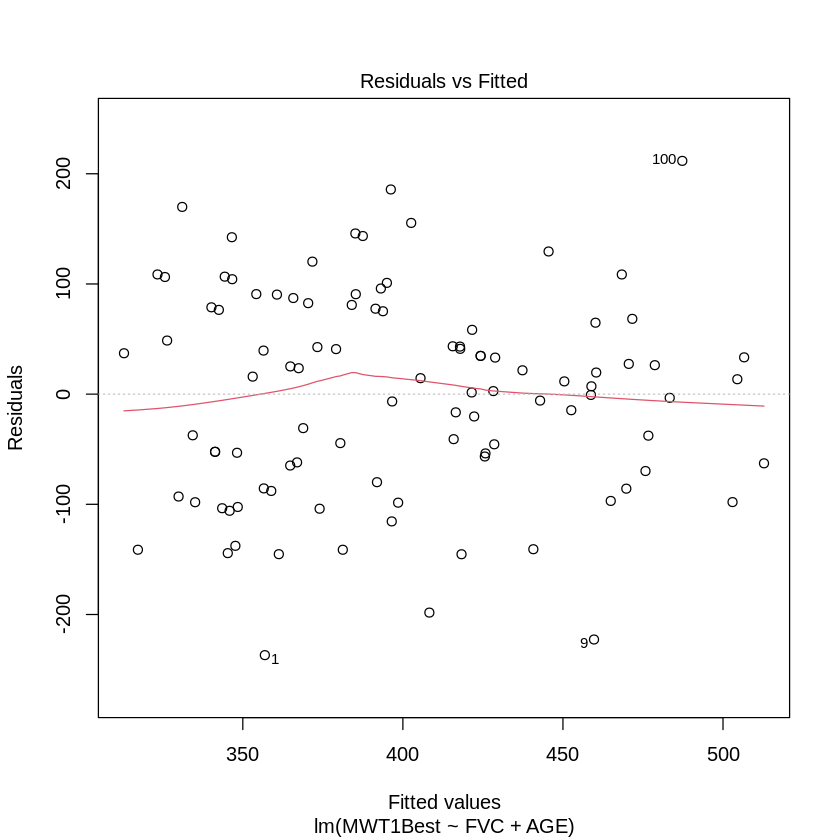

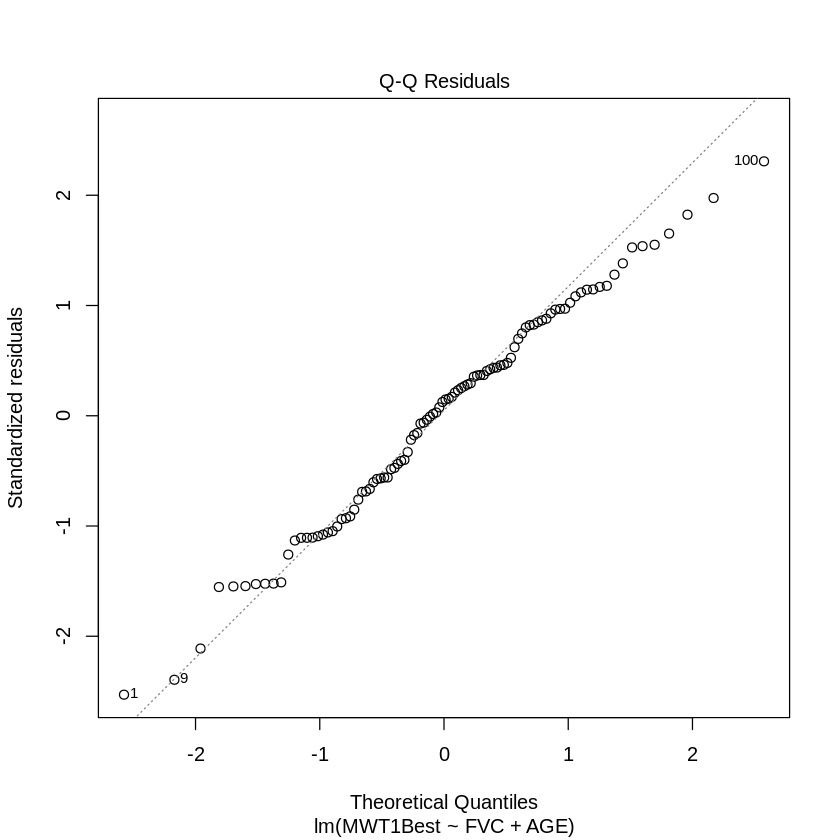

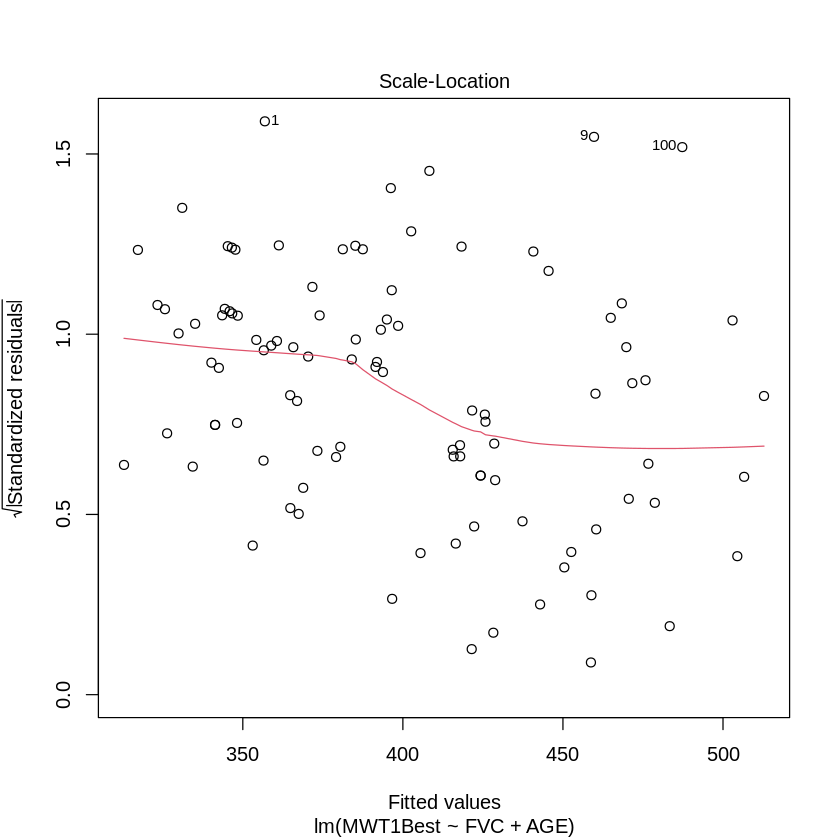

[1] 10

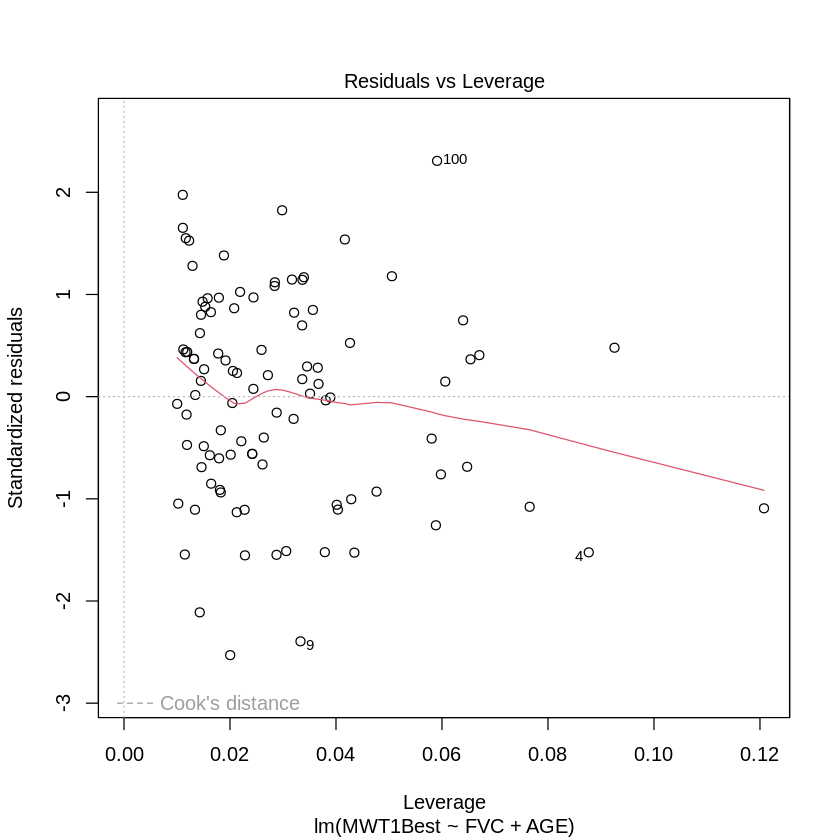

In [30]:
# MLR Practice

MWT1Best_FVC <- lm(MWT1Best~FVC,data = COPD)
summary(MWT1Best_FVC)

MWT1Best_FVC_AGE <- lm(MWT1Best~FVC+AGE,data = COPD)
summary(MWT1Best_FVC_AGE)
confint(MWT1Best_FVC_AGE)
plot(MWT1Best_FVC_AGE)



IQR((COPD$AGE))